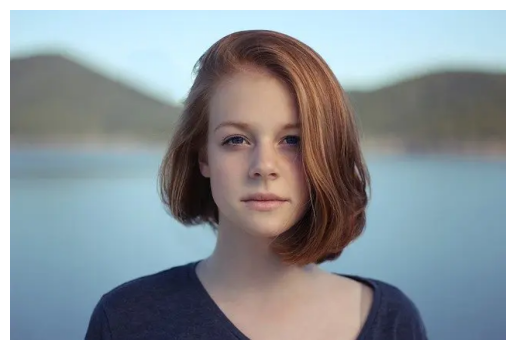

In [57]:
import cv2
import matplotlib.pyplot as plt

imagem = cv2.imread('face.jpg')

imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# bordas = cv2.Canny(imagem_gray, 100, 200)

plt.imshow(imagem_rgb)
plt.axis('off')
plt.show()

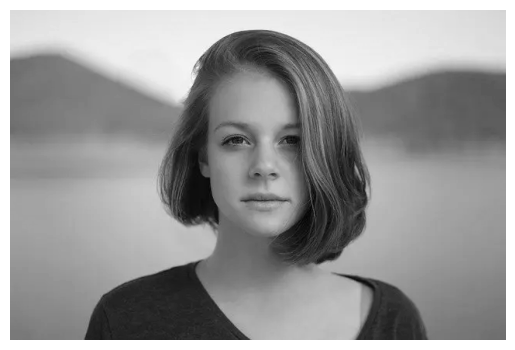

In [58]:
import cv2
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread('face.jpg')

# Converter a imagem suavizada para tons de cinza
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Mostrar a imagem em tons de cinza
plt.imshow(imagem_gray, cmap='gray')
plt.axis('off')
plt.show()

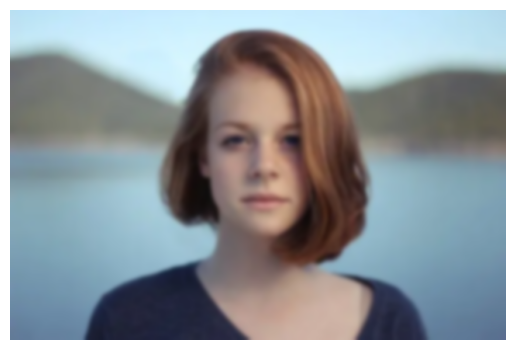

In [59]:
import cv2
import matplotlib.pyplot as plt

imagem = cv2.imread('face.jpg')

# imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

imagem_suavizada = cv2.GaussianBlur(imagem, (15, 15), 0)

imagem = cv2.cvtColor(imagem_suavizada, cv2.COLOR_BGR2RGB)

# bordas = cv2.Canny(imagem_gray, 100, 200)

plt.imshow(imagem)
plt.axis('off')
plt.show()

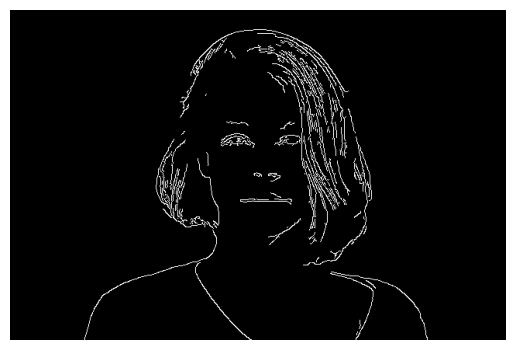

In [60]:
import cv2
import matplotlib.pyplot as plt

imagem = cv2.imread('face.jpg')

imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

bordas = cv2.Canny(imagem_gray, 100, 200)

plt.imshow(bordas, cmap='gray')
plt.axis('off')
plt.show()

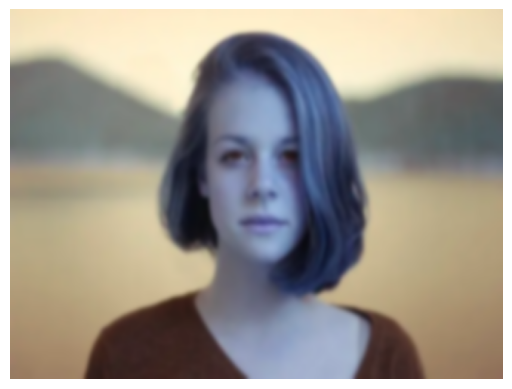

In [61]:
largura = 800
altura = 600
dimensoes = (largura, altura)

imagem_redimensionada = cv2.resize(imagem_suavizada, dimensoes, interpolation=cv2.INTER_AREA)

plt.imshow(imagem_redimensionada)
plt.axis('off')
plt.show()

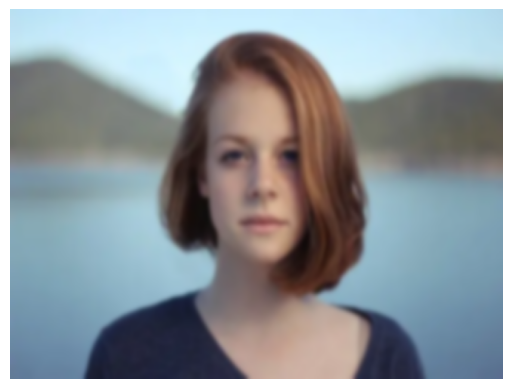

In [62]:
inicio = (500, 20) 
fim = (170, 350)
cor = (255, 0, 0)
espessura = 2

imagem_com_retangulo = cv2.rectangle(imagem_redimensionada.copy(), inicio, fim, cor, espessura)

imagem_cvt_color = cv2.cvtColor(imagem_redimensionada, cv2.COLOR_BGR2RGB)

plt.imshow(imagem_cvt_color)
plt.axis('off')
plt.show()

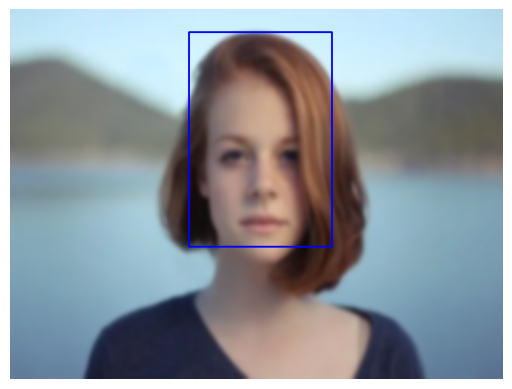

In [63]:
# Carregar o classificador de cascata de Haar
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# Detectar faces na imagem
faces = face_cascade.detectMultiScale(imagem_redimensionada, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Desenhar retângulos ao redor das faces detectadas
for (x, y, w, h) in faces:
    hair_y = max(0, y - int(h/2))
    combined_height = h + (y - hair_y)

    cv2.rectangle(imagem_redimensionada, (x, hair_y), (x+w, hair_y + combined_height), (255, 0, 0), 2)

# Converter a imagem com retângulos para RGB
imagem_cvt_color_hair = cv2.cvtColor(imagem_redimensionada, cv2.COLOR_BGR2RGB)

# Exibir a imagem
plt.imshow(imagem_cvt_color_hair)
plt.axis('off')
plt.show()

In [64]:
caminho = 'imagem_processada.jpg'
cv2.imwrite(caminho, imagem_redimensionada)

True